In [31]:
import pandas as pd
import matplotlib.pyplot as plt

calls_general = pd.read_csv('../data/clean/calls_general.csv')

In [32]:
# Converting the CallDateTime column into columns that are more useful

calls_general['CallDateTime'] = pd.to_datetime(calls_general['CallDateTime'])
calls_general['week_of_year'] = calls_general['CallDateTime'].dt.isocalendar().week
calls_general['weekday'] = calls_general['CallDateTime'].dt.day_name()
calls_general['hour_of_day'] = calls_general['CallDateTime'].dt.hour


In [33]:
calls_general.head()

,CallDescription,Longitude,Latitude,CallDateTime,week_of_year,weekday,hour_of_day
0,Medical Emergencies,-78.164122,39.171316,2016-12-01 05:35:23,48,Thursday,5
1,Trauma & Injury,-78.170729,39.167610,2016-12-01 10:03:51,48,Thursday,10
2,Trauma & Injury,-78.159111,39.175520,2016-12-01 16:58:41,48,Thursday,16
3,Medical Emergencies,-78.186034,39.138891,2016-12-01 20:42:58,48,Thursday,20
4,Medical Emergencies,-78.165961,39.187564,2016-12-01 23:16:32,48,Thursday,23


In [34]:
# Types of General Calls

general_call_types = calls_general['CallDescription'].drop_duplicates()
print(general_call_types)

0                  Medical Emergencies
1                      Trauma & Injury
7                     Non-Urgent Calls
12                               Other
178    Behavioral & Psychiatric Issues
Name: CallDescription, dtype: object


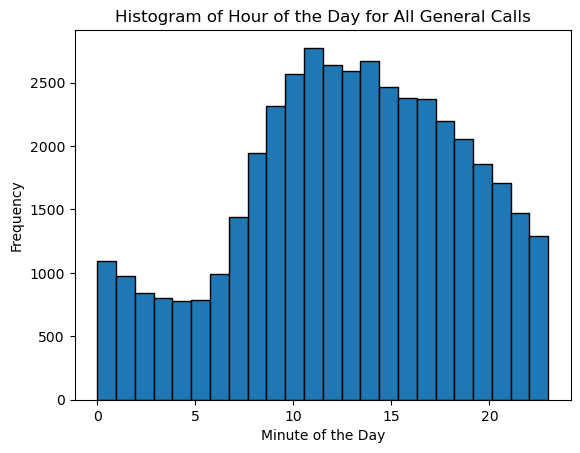

In [35]:
# Plotting all General Calls by minute of day

plt.hist(calls_general['hour_of_day'], bins=24, edgecolor='black')
plt.xlabel('Minute of the Day')
plt.ylabel('Frequency')
plt.title('Histogram of Hour of the Day for All General Calls')
plt.show()

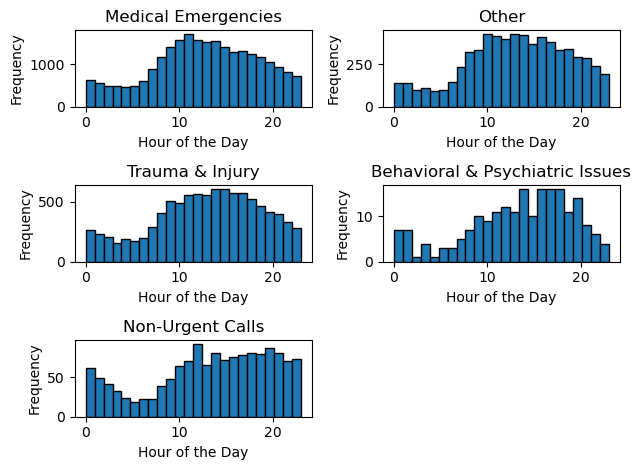

In [36]:
# Plotting general calls by minute of the day for each type of general call
medical_emergencies = calls_general[calls_general['CallDescription'] == 'Medical Emergencies']
trauma_injuries = calls_general[calls_general['CallDescription'] == 'Trauma & Injury']
nonurgent_calls = calls_general[calls_general['CallDescription'] == 'Non-Urgent Calls']
other = calls_general[calls_general['CallDescription'] == 'Other']
behavioral_psychiatric_issues = calls_general[calls_general['CallDescription'] == 'Behavioral & Psychiatric Issues']

fig, axs = plt.subplots(3,2)

axs[0,0].hist(medical_emergencies['hour_of_day'], bins=24, edgecolor='black')
axs[0,0].set_xlabel('Hour of the Day')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_title('Medical Emergencies')

axs[1,0].hist(trauma_injuries['hour_of_day'], bins=24, edgecolor='black')
axs[1,0].set_xlabel('Hour of the Day')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_title('Trauma & Injury')

axs[2,0].hist(nonurgent_calls['hour_of_day'], bins=24, edgecolor='black')
axs[2,0].set_xlabel('Hour of the Day')
axs[2,0].set_ylabel('Frequency')
axs[2,0].set_title('Non-Urgent Calls')

axs[0,1].hist(other['hour_of_day'], bins=24, edgecolor='black')
axs[0,1].set_xlabel('Hour of the Day')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_title('Other')

axs[1,1].hist(behavioral_psychiatric_issues['hour_of_day'], bins=24, edgecolor='black')
axs[1,1].set_xlabel('Hour of the Day')
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_title('Behavioral & Psychiatric Issues')


axs[2,1].axis('off')

plt.tight_layout()

plt.show()

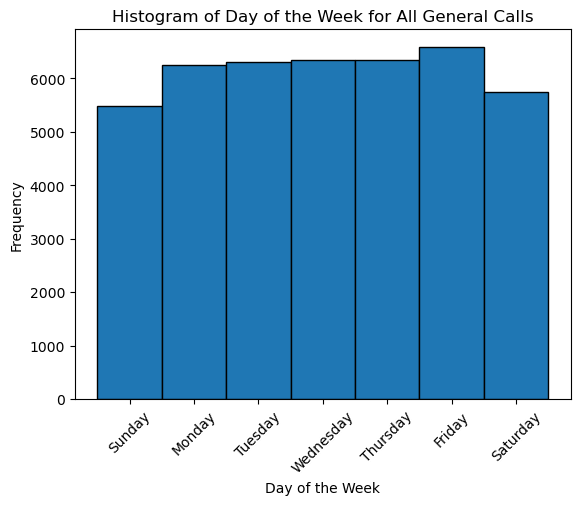

In [37]:
# Plotting all General Calls by day of week

day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

general_ordered_counts = calls_general['weekday'].value_counts().reindex(day_order, fill_value=0)

plt.bar(general_ordered_counts.index, general_ordered_counts.values, edgecolor='black', width=1, align='center')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Histogram of Day of the Week for All General Calls')
plt.xticks(rotation=45)

plt.show()

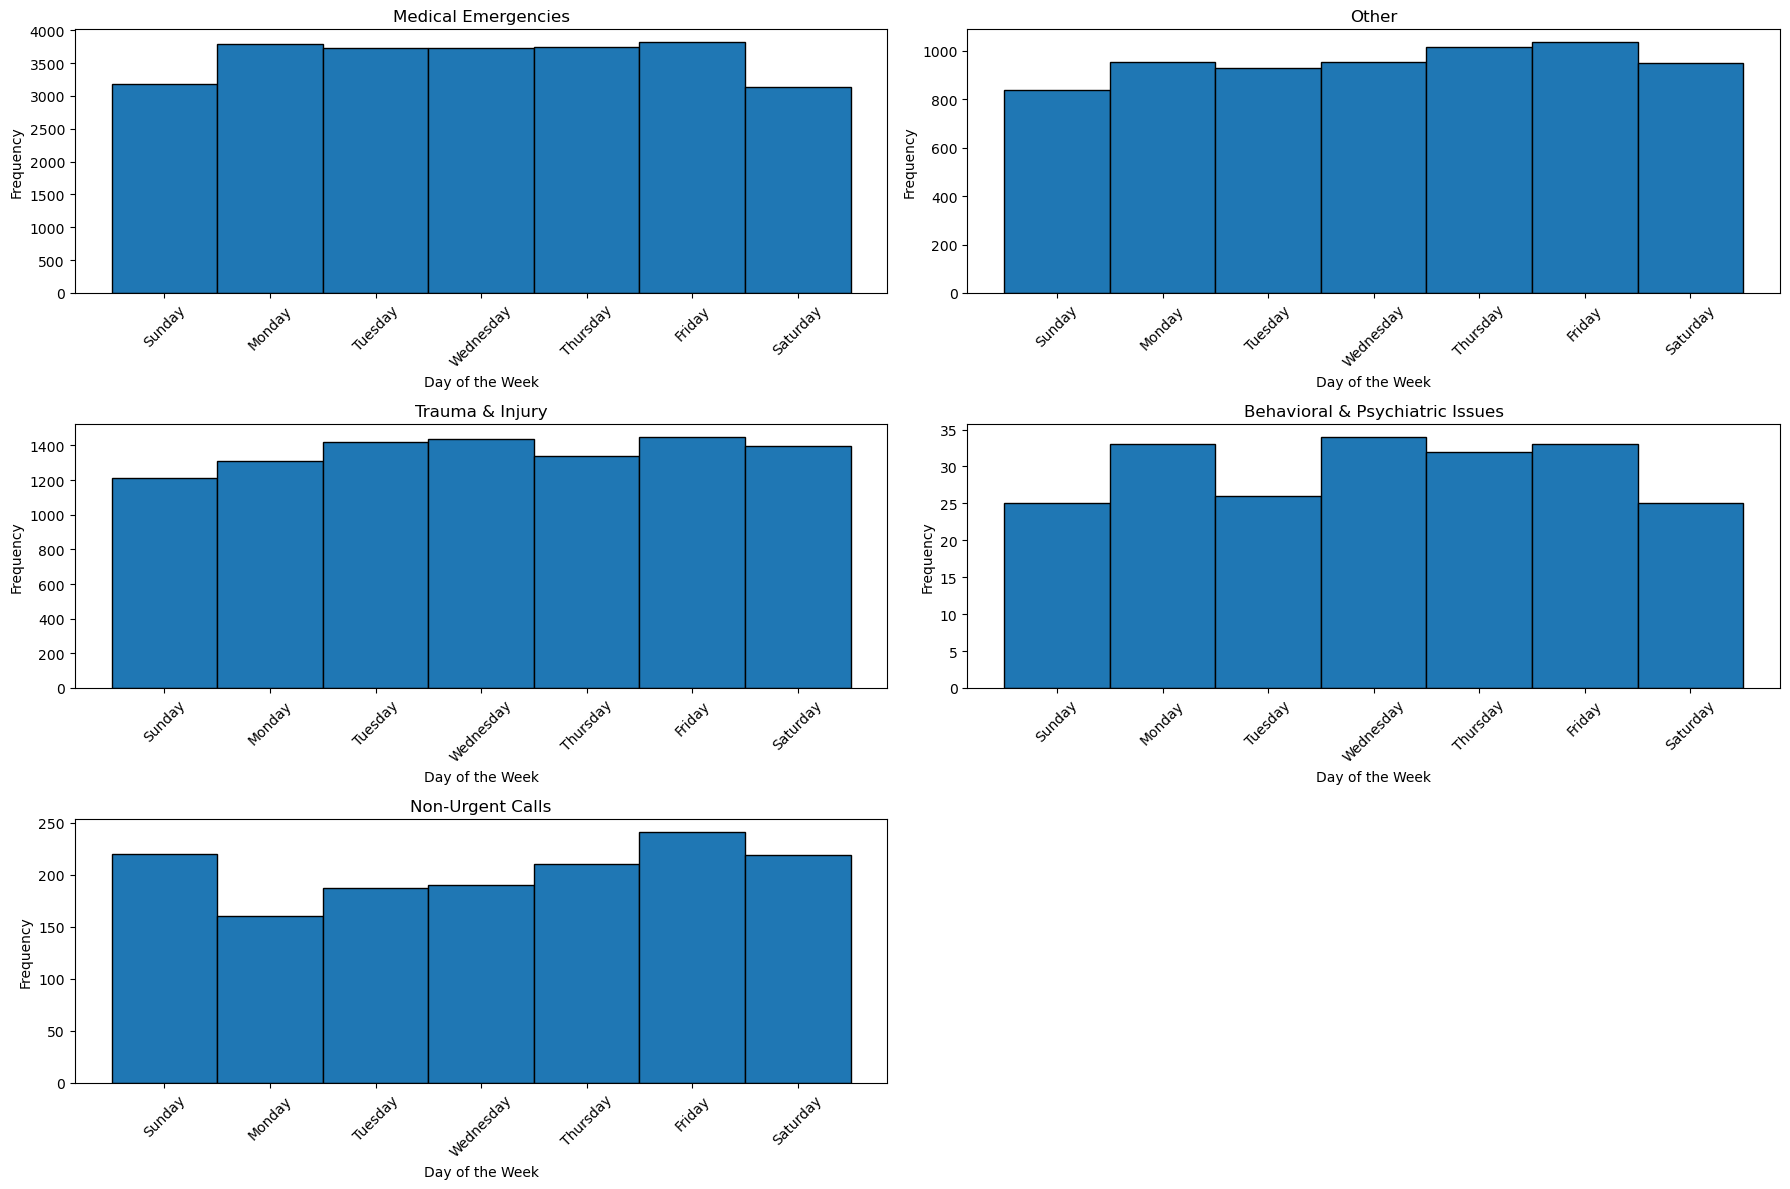

In [38]:
# Plotting general calls by minute of the day for each type of general call
medical_emergencies_ordered_counts = medical_emergencies['weekday'].value_counts().reindex(day_order, fill_value=0)
trauma_injuries_ordered_counts = trauma_injuries['weekday'].value_counts().reindex(day_order, fill_value=0)
nonurgent_calls_ordered_counts = nonurgent_calls['weekday'].value_counts().reindex(day_order, fill_value=0)
other_ordered_counts = other['weekday'].value_counts().reindex(day_order, fill_value=0)
behavioral_psychiatric_issues_ordered_counts = behavioral_psychiatric_issues['weekday'].value_counts().reindex(day_order, fill_value=0)

fig, axs = plt.subplots(3,2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.8, wspace=0.1)

axs[0,0].bar(medical_emergencies_ordered_counts.index, medical_emergencies_ordered_counts.values, edgecolor='black', width=1, align='center')
axs[0,0].set_xlabel('Day of the Week')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_title('Medical Emergencies')
axs[0,0].tick_params(axis='x', rotation=45)

axs[1,0].bar(trauma_injuries_ordered_counts.index, trauma_injuries_ordered_counts.values, edgecolor='black', width=1, align='center')
axs[1,0].set_xlabel('Day of the Week')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_title('Trauma & Injury')
axs[1,0].tick_params(axis='x', rotation=45)

axs[2,0].bar(nonurgent_calls_ordered_counts.index, nonurgent_calls_ordered_counts.values, edgecolor='black', width=1, align='center')
axs[2,0].set_xlabel('Day of the Week')
axs[2,0].set_ylabel('Frequency')
axs[2,0].set_title('Non-Urgent Calls')
axs[2,0].tick_params(axis='x', rotation=45)

axs[0,1].bar(other_ordered_counts.index, other_ordered_counts.values, edgecolor='black', width=1, align='center')
axs[0,1].set_xlabel('Day of the Week')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_title('Other')
axs[0,1].tick_params(axis='x', rotation=45)

axs[1,1].bar(behavioral_psychiatric_issues_ordered_counts.index, behavioral_psychiatric_issues_ordered_counts.values, edgecolor='black', width=1, align='center')
axs[1,1].set_xlabel('Day of the Week')
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_title('Behavioral & Psychiatric Issues')
axs[1,1].tick_params(axis='x', rotation=45)


axs[2,1].axis('off')

plt.tight_layout()

plt.show()


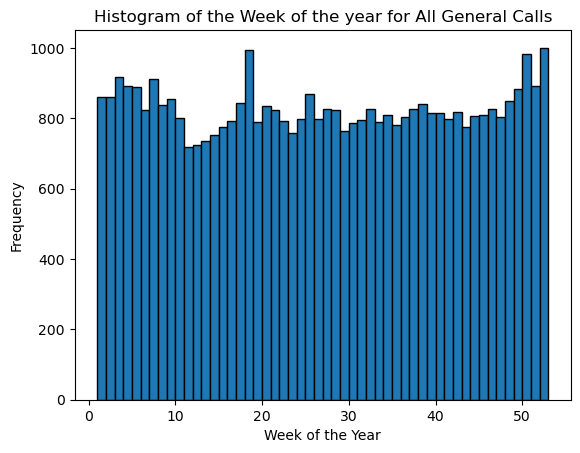

In [39]:
# Plotting all General Calls by week of year

plt.hist(calls_general['week_of_year'], bins=52, edgecolor='black')
plt.xlabel('Week of the Year')
plt.ylabel('Frequency')
plt.title('Histogram of the Week of the year for All General Calls')
plt.show()

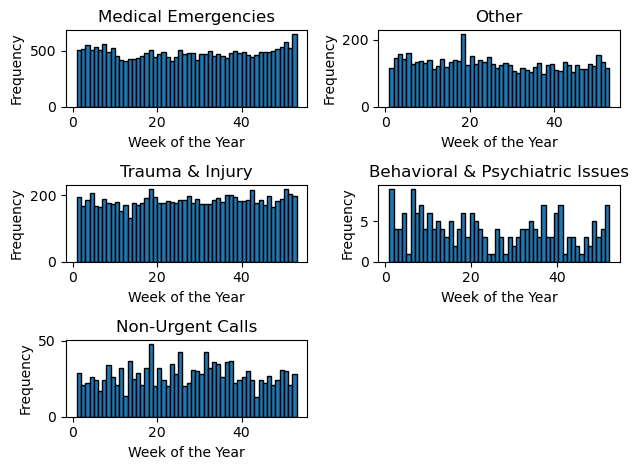

In [40]:
# Plotting general calls by the week of the year for each type of general call
fig, axs = plt.subplots(3,2)

axs[0,0].hist(medical_emergencies['week_of_year'], bins=52, edgecolor='black')
axs[0,0].set_xlabel('Week of the Year')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_title('Medical Emergencies')

axs[1,0].hist(trauma_injuries['week_of_year'], bins=52, edgecolor='black')
axs[1,0].set_xlabel('Week of the Year')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_title('Trauma & Injury')

axs[2,0].hist(nonurgent_calls['week_of_year'], bins=52, edgecolor='black')
axs[2,0].set_xlabel('Week of the Year')
axs[2,0].set_ylabel('Frequency')
axs[2,0].set_title('Non-Urgent Calls')

axs[0,1].hist(other['week_of_year'], bins=52, edgecolor='black')
axs[0,1].set_xlabel('Week of the Year')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_title('Other')

axs[1,1].hist(behavioral_psychiatric_issues['week_of_year'], bins=52, edgecolor='black')
axs[1,1].set_xlabel('Week of the Year')
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_title('Behavioral & Psychiatric Issues')


axs[2,1].axis('off')

plt.tight_layout()

plt.show()